In [1]:
import pandas as pd
from torch_geometric.datasets import TUDataset


In [2]:
import gc
from tqdm import tqdm

In [23]:
# Read the data from the CSV file
tudataset_df = pd.read_csv('TUDataset.csv')
tudataset_df

,name,Graphs,Classes,Avg. Nodes,Avg. Edges,Node Labels,Edge Labels,Node Attr.,Geometry,Edge Attr.,catagory
0,AIDS,2000,2,15.69,16.20,+,+,+ (4),--,--,Small molecules
1,alchemy_full,202579,R (12),10.10,10.44,+,+,+ (3),"3D, RI",--,Small molecules
2,aspirin,111763,R (1),21.00,151.52,+,--,+ (6),"3D, RI",--,Small molecules
3,benzene,527984,R (1),12.00,64.94,+,--,+ (6),"3D, RI",--,Small molecules
4,BZR,405,2,35.75,38.36,+,--,+ (3),"3D, RI",--,Small molecules
...,...,...,...,...,...,...,...,...,...,...,...
131,COLORS-3,10500,11,61.31,91.03,--,--,+ (4),--,--,Synthetic
132,SYNTHETIC,300,2,100.00,196.00,+,--,+ (1),--,--,Synthetic
133,SYNTHETICnew,300,2,100.00,196.25,--,--,+ (1),--,--,Synthetic
134,Synthie,400,4,95.00,172.93,--,--,+ (15),--,--,Synthetic


In [24]:
# clean the data

# remove unneccessary columns
drop_columns = ['Node Labels', 'Edge Labels', 'Geometry']
tudataset_df = tudataset_df.drop(drop_columns, axis=1)
# remove regression datasets
tudataset_df = tudataset_df[~tudataset_df['Classes'].str.contains('R')]
# change data tyep of 'Classes' to int
tudataset_df['Classes'] = tudataset_df['Classes'].astype(int)
tudataset_df['catagory'] = tudataset_df['catagory'].astype('category')


In [25]:
tudataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 135
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        122 non-null    object  
 1   Graphs      122 non-null    int64   
 2   Classes     122 non-null    int64   
 3   Avg. Nodes  122 non-null    float64 
 4   Avg. Edges  122 non-null    float64 
 5   Node Attr.  122 non-null    object  
 6   Edge Attr.  122 non-null    object  
 7   catagory    122 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 8.0+ KB


In [26]:


# change the data in the 'Node Attr.' column 

# skip_list = ['benzene', 'ethanol', 'malonaldehyde', 'naphthalene', 'QM9', 'salicylic_acid', 'toluene', 'uracil']

# for loop to all data set namae
for i in tqdm(range(0, len(tudataset_df))):
    if tudataset_df.iloc[i]['Graphs'] > 100000:
        # print(f'Skipping {tudataset_df.iloc[i]["name"]} because it has too many graphs')
        # drop the row
        tudataset_df = tudataset_df.drop(i)
        continue

    dataset_name = tudataset_df.iloc[i]['name']
    # print('dataset_name:', dataset_name)

    try:
        dataset = TUDataset(root='data/TUDataset', name=dataset_name)
    except:
        print(f'Error in loading {dataset_name}')
        continue

    num_features = dataset.num_features
    
    tudataset_df.at[i, 'Node Attr.'] = num_features # change the data in the 'Node Attr.' column

    del dataset
    # print('num_features:', num_features)
    gc.collect() # garbage collection
    

 78%|███████▊  | 95/122 [00:30<00:06,  3.98it/s]

Error in loading dblp_ct1


Processing...
 79%|███████▊  | 96/122 [00:31<00:06,  3.79it/s]

Error in loading dblp_ct2


Processing...
 80%|████████  | 98/122 [00:32<00:12,  1.95it/s]

Error in loading DBLP_v1


Processing...
 81%|████████  | 99/122 [00:33<00:11,  1.96it/s]

Error in loading facebook_ct1


Processing...
 82%|████████▏ | 100/122 [00:34<00:13,  1.68it/s]

Error in loading facebook_ct2


 83%|████████▎ | 101/122 [00:34<00:10,  1.95it/s]Processing...
Processing...


Error in loading highschool_ct1
Error in loading highschool_ct2


 86%|████████▌ | 105/122 [00:35<00:04,  4.01it/s]Processing...
Processing...
 88%|████████▊ | 107/122 [00:35<00:02,  5.07it/s]

Error in loading infectious_ct1
Error in loading infectious_ct2


Processing...
 89%|████████▊ | 108/122 [00:35<00:02,  4.81it/s]

Error in loading mit_ct1


Processing...
 89%|████████▉ | 109/122 [00:35<00:02,  4.75it/s]

Error in loading mit_ct2


 95%|█████████▌| 116/122 [00:36<00:00,  6.48it/s]

Error in loading tumblr_ct2


100%|██████████| 122/122 [00:37<00:00,  3.24it/s]

Error in loading nan
Error in loading nan


In [ ]:
tudataset_df

In [27]:
# the catagory 'Small molecules'
small_molecules_dataset = tudataset_df[tudataset_df['catagory'] == 'Small molecules']['name']
# the catagory 'Bioinformatics'
bioinformatics_dataset = tudataset_df[tudataset_df['catagory'] == 'Bioinformatics']['name']
# the catagory 'Computer Vision'
computer_vision_dataset = tudataset_df[tudataset_df['catagory'] == 'Computer vision']['name']
# the catagory 'Social networks'
social_networks_dataset = tudataset_df[tudataset_df['catagory'] == 'Social networks']['name']
# the catagory 'Synthetic'
synthetic_dataset = tudataset_df[tudataset_df['catagory'] == 'Synthetic']['name']

# print the datasets
print('Small molecules dataset:')
print(small_molecules_dataset.to_list())
print('Bioinformatics dataset:')
print(bioinformatics_dataset.to_list())
print('Computer Vision dataset:')
print(computer_vision_dataset.to_list())
print('Social networks dataset:')
print(social_networks_dataset.to_list())
print('Synthetic dataset:')
print(synthetic_dataset.to_list())

Small molecules dataset:
['AIDS', 'BZR', 'BZR_MD', 'COX2', 'COX2_MD', 'DHFR', 'DHFR_MD', 'ER_MD', 'FRANKENSTEIN', 'MCF-7', 'MCF-7H', 'MOLT-4', 'MOLT-4H', 'Mutagenicity', 'MUTAG', 'NCI1', 'NCI109', 'NCI-H23', 'NCI-H23H', 'OVCAR-8', 'OVCAR-8H', 'P388', 'P388H', 'PC-3', 'PC-3H', 'PTC_FM', 'PTC_FR', 'PTC_MM', 'PTC_MR', 'SF-295', 'SF-295H', 'SN12C', 'SN12CH', 'SW-620', 'SW-620H', 'Tox21_AhR_training', 'Tox21_AhR_testing', 'Tox21_AhR_evaluation', 'Tox21_AR_training', 'Tox21_AR_testing', 'Tox21_AR_evaluation', 'Tox21_AR-LBD_training', 'Tox21_AR-LBD_testing', 'Tox21_AR-LBD_evaluation', 'Tox21_ARE_training', 'Tox21_ARE_testing', 'Tox21_ARE_evaluation', 'Tox21_aromatase_training', 'Tox21_aromatase_testing', 'Tox21_aromatase_evaluation', 'Tox21_ATAD5_training', 'Tox21_ATAD5_testing', 'Tox21_ATAD5_evaluation', 'Tox21_ER_training', 'Tox21_ER_testing', 'Tox21_ER_evaluation', 'Tox21_ER-LBD_training', 'Tox21_ER-LBD_testing', 'Tox21_ER-LBD_evaluation', 'Tox21_HSE_training', 'Tox21_HSE_testing', 'Tox21_

                                      Dataset: DD(1178)                                      

Initial val loss: 0.6979, Initial val accuracy: 0.4534
Epoch: 000 (0m 00s), Train Loss: 0.6836, Val Loss: 0.6775, Train Acc: 0.5966, Val Acc: 0.5466
Epoch: 010 (0m 04s), Train Loss: 0.6733, Val Loss: 0.6742, Train Acc: 0.5966, Val Acc: 0.5466
Epoch: 020 (0m 07s), Train Loss: 0.6076, Val Loss: 0.5925, Train Acc: 0.7006, Val Acc: 0.7119
Epoch: 030 (0m 11s), Train Loss: 0.5983, Val Loss: 0.5466, Train Acc: 0.7473, Val Acc: 0.7119
Epoch: 040 (0m 15s), Train Loss: 0.5401, Val Loss: 0.5084, Train Acc: 0.7590, Val Acc: 0.7246
Epoch: 050 (0m 19s), Train Loss: 0.5793, Val Loss: 0.6509, Train Acc: 0.6338, Val Acc: 0.5890
Epoch: 060 (0m 22s), Train Loss: 0.6737, Val Loss: 0.5227, Train Acc: 0.7675, Val Acc: 0.6398
Epoch: 070 (0m 26s), Train Loss: 0.4236, Val Loss: 0.3778, Train Acc: 0.8461, Val Acc: 0.7373
Epoch: 080 (0m 30s), Train Loss: 0.3548, Val Loss: 0.3309, Train Acc: 0.8737, Val Acc: 0.7415
Epoc

/tmp/ipykernel_71897/3520095269.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, data_point], ignore_index=True)


Epoch: 000 (0m 00s), Train Loss: 1.8271, Val Loss: 1.7786, Train Acc: 0.1583, Val Acc: 0.1667
Epoch: 010 (0m 01s), Train Loss: 1.7207, Val Loss: 1.6926, Train Acc: 0.2667, Val Acc: 0.2500
Epoch: 020 (0m 02s), Train Loss: 1.7061, Val Loss: 1.7119, Train Acc: 0.2104, Val Acc: 0.1750
Epoch: 030 (0m 03s), Train Loss: 1.7020, Val Loss: 1.6835, Train Acc: 0.2625, Val Acc: 0.2167
Epoch: 040 (0m 04s), Train Loss: 1.7297, Val Loss: 1.7036, Train Acc: 0.2437, Val Acc: 0.1917
Epoch: 050 (0m 05s), Train Loss: 1.7126, Val Loss: 1.6923, Train Acc: 0.2729, Val Acc: 0.2000
Epoch: 060 (0m 06s), Train Loss: 1.6668, Val Loss: 1.6421, Train Acc: 0.3229, Val Acc: 0.2917
Epoch: 070 (0m 07s), Train Loss: 1.6673, Val Loss: 1.6254, Train Acc: 0.3250, Val Acc: 0.2833
Epoch: 080 (0m 08s), Train Loss: 1.6837, Val Loss: 1.6997, Train Acc: 0.2625, Val Acc: 0.2250
Epoch: 090 (0m 09s), Train Loss: 1.6508, Val Loss: 1.6224, Train Acc: 0.3500, Val Acc: 0.3083
Epoch: 100 (0m 11s), Train Loss: 1.6210, Val Loss: 1.5971, T

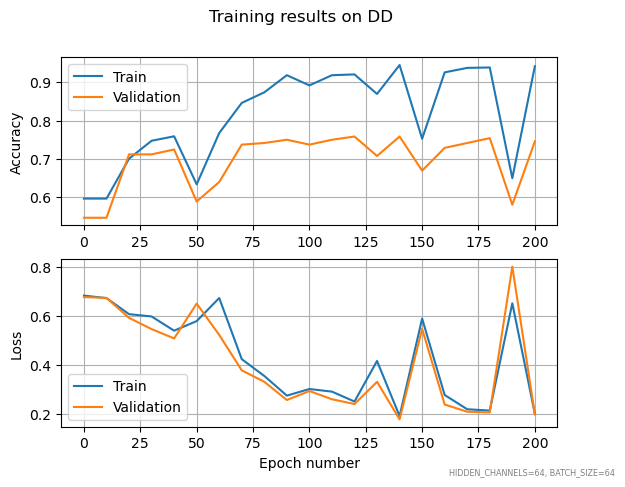

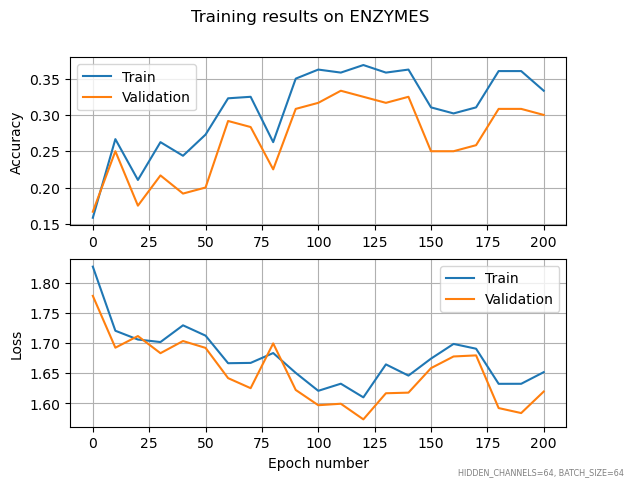

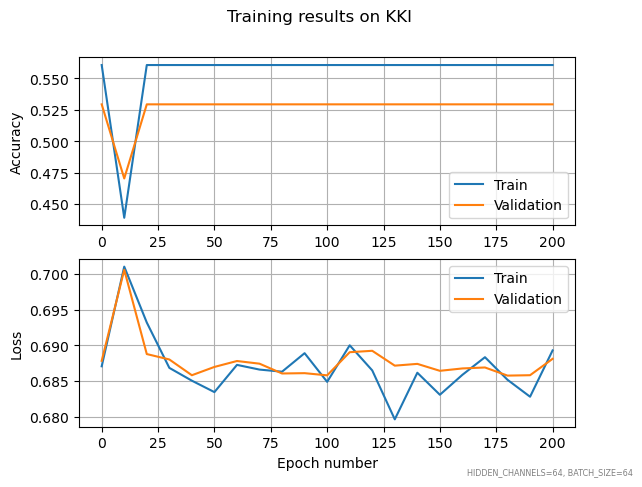

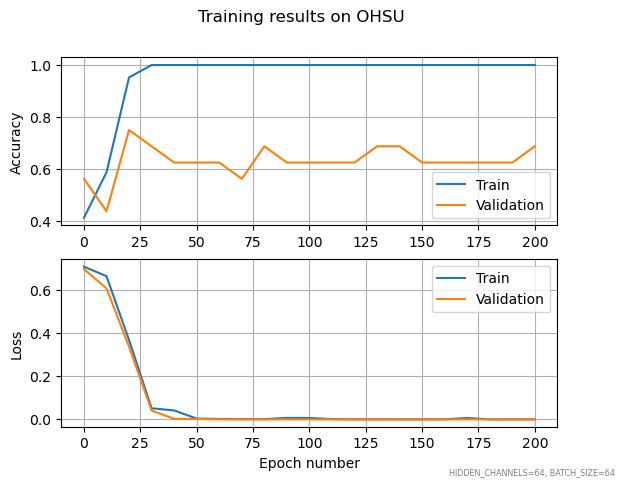

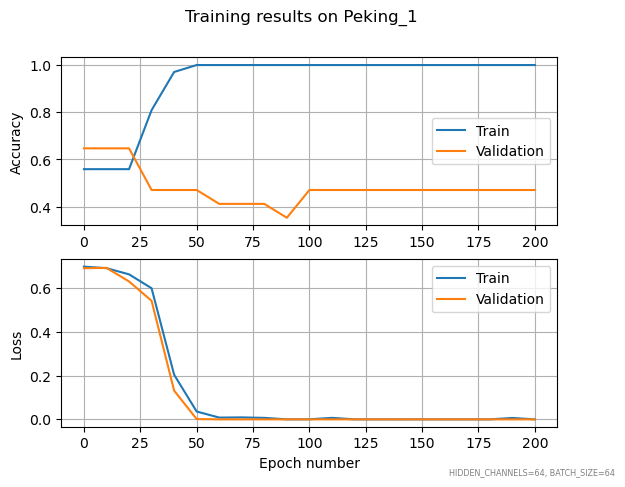

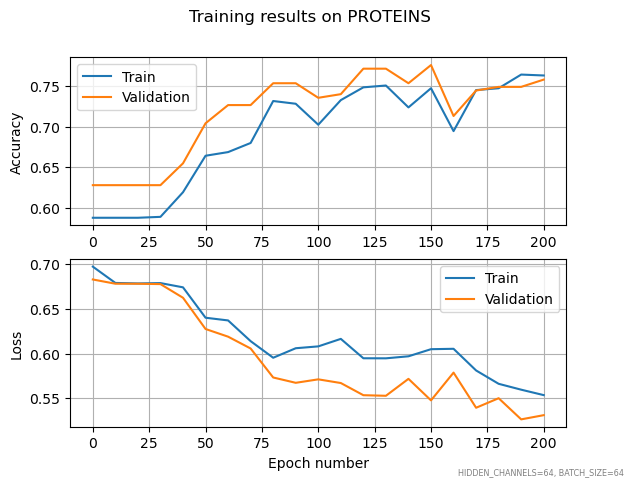

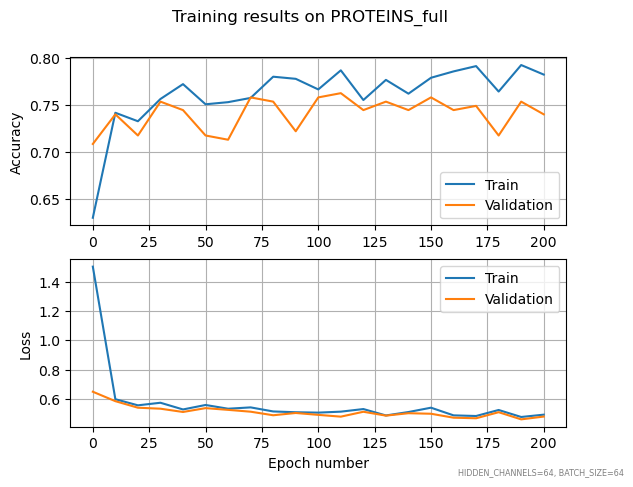

In [26]:
from my_gnn import run

HIDDEN_CHANNELS = 64
NUM_EPOCHS = 200
BATCH_SIZE = 64

dataset = bioinformatics_dataset

result_df = pd.DataFrame(columns=['name', 'best_val_loss', 'best_acc'])

for dataset_name in dataset:
    best_val_loss, best_acc = run(dataset_name, HIDDEN_CHANNELS, NUM_EPOCHS, BATCH_SIZE)  
    data_point = pd.DataFrame([{'name': dataset_name, 'best_val_loss': best_val_loss, 'best_acc': best_acc}])
    result_df = pd.concat([result_df, data_point], ignore_index=True)

result_df.to_csv('result.csv', index=False)

In [27]:
data = pd.read_csv('result.csv')
data

,name,best_val_loss,best_acc
0,DD,1.773043e-01,0.758475
1,ENZYMES,1.573612e+00,0.325000
2,KKI,6.557073e-01,0.529412
3,OHSU,7.568843e-09,0.625000
4,Peking_1,0.000000e+00,0.470588
5,PROTEINS,5.230304e-01,0.735426
6,PROTEINS_full,4.554963e-01,0.748879
